<center><h1><font color='green'>Datalab Visualizations </font></h1></center>
<br/>

<h2>05_01.Charting API</h2>

In [3]:
%%chart --help

usage: %%chart [-h]
               {annotation,area,bars,bubbles,calendar,candlestick,columns,combo,gauge,geo,heatmap,histogram,line,map,org,paged_table,pie,sankey,scatter,stepped_area,table,timeline,treemap}
               ...

Generate an inline chart using Google Charts using the data in a Table, Query,
dataframe, or list. Numerous types of charts are supported. Options for the
charts can be specified in the cell body using YAML or JSON.

positional arguments:
  {annotation,area,bars,bubbles,calendar,candlestick,columns,combo,gauge,geo,heatmap,histogram,line,map,org,paged_table,pie,sankey,scatter,stepped_area,table,timeline,treemap}
                        commands
    annotation          Generate a annotation chart.
    area                Generate a area chart.
    bars                Generate a bars chart.
    bubbles             Generate a bubbles chart.
    calendar            Generate a calendar chart.
    candlestick         Generate a candlestick chart.
    columns          

<h2>05_02.Line Chart</h2>

In [15]:
%%bq query --name campaign_line
SELECT OFFER_DATE, COUNT(*) as OFFERS, SUM(CONVERT) as CONVERTS 
FROM EDA.campaigns
GROUP BY OFFER_DATE
ORDER BY OFFER_DATE 

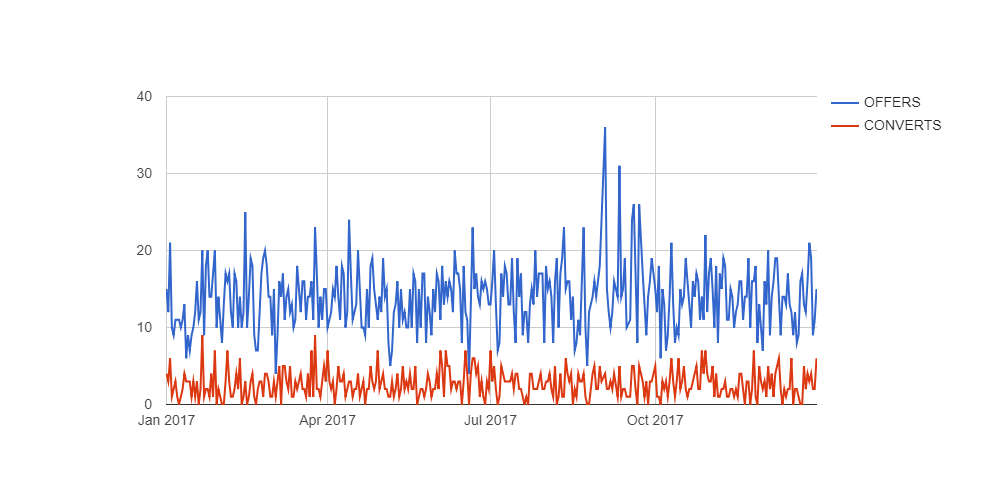

In [19]:
%%chart line --fields OFFER_DATE,OFFERS,CONVERTS --data campaign_line
height: 500

<h2>05_03.Pie Chart</h2>

In [27]:
%%bq query --name WeekDay
SELECT OFFER_WEEK, COUNT(*) as OFFERS
FROM EDA.campaigns
GROUP BY OFFER_WEEK
ORDER BY OFFER_WEEK 

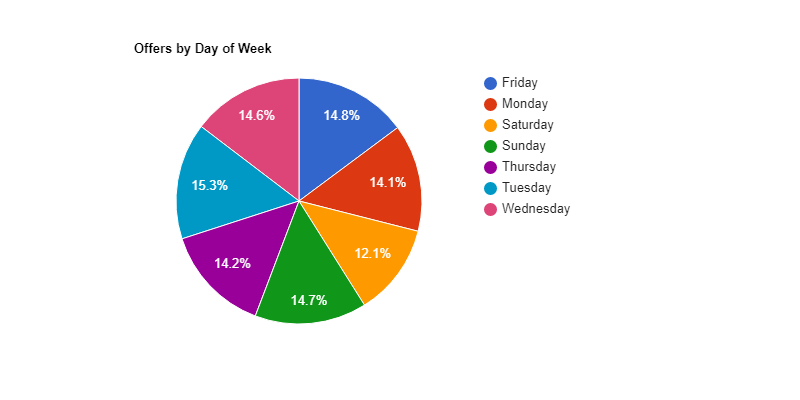

In [29]:
%%chart pie --fields OFFER_WEEK,OFFERS --data WeekDay
title: Offers by Day of Week
height: 400
width: 800

<h2>05_04.TimeSeries with Storage data</h2>

In [30]:
%%gcs read --object 'gs://course-prep/source-data/campaign_data.csv' --variable campaign_data

In [54]:
import pandas as pd
from StringIO import StringIO

#Convert campaign_data to a Dataframe
campaign_df= pd.read_csv(StringIO(campaign_data))
#Aggregate by conversion by offer date
date_summary=campaign_df.groupby(['OFFER_DATE'],as_index=False)['CONVERT'].sum()
print(date_summary.head())

#Convert OFFER_DATE to datetime. This is required for timeseries
date_summary['OFFER_DATE'] = pd.to_datetime(date_summary['OFFER_DATE'])
date_summary.dtypes

  OFFER_DATE  CONVERT
0   1/1/2017        4
1  1/10/2017        2
2  1/11/2017        4
3  1/12/2017        3
4  1/13/2017        3


OFFER_DATE    datetime64[ns]
CONVERT                int64
dtype: object

In [53]:
%%chart annotation --fields OFFER_DATE,CONVERT --data date_summary
title: Conversion by Day
height: 400